<a href="https://colab.research.google.com/github/HenryH11/introduccion_machine_learning/blob/main/Introduccion_a_Machine_Learning_Optimizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

datos = pd.read_csv("carros.csv")
datos.head()

,precio,vendido,edad_del_modelo,km_by_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [ ]:
#situacion con los datos ordenados de la peor manera
datos_ord = datos.sort_values("vendido", ascending=True)
x_ord = datos_ord[["precio", "edad_del_modelo","km_by_year"]]
y_ord = datos_ord["vendido"]
datos_ord.head()

,precio,vendido,edad_del_modelo,km_by_year
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con dummy stratified, 10 = [58.00, 58.00]


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con cross validation, 10 = [73.83, 77.73]


In [ ]:
#generando datos aleatorios del modelo de carro
np.random.seed(SEED)
datos['modelo'] = datos.edad_del_modelo + np.random.randint(-2, 3, size=10000)
datos.modelo = datos.modelo + abs(datos.modelo.min()) + 1
datos.head()

,precio,vendido,edad_del_modelo,km_by_year,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [ ]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desviacion = results['test_score'].std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [ ]:
# GroupKFold en un pipeline con StandardScaler y SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacion',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 76.68
Intervalo [74.28, 79.08]


In [ ]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 75.78
Intervalo [73.67, 77.90]


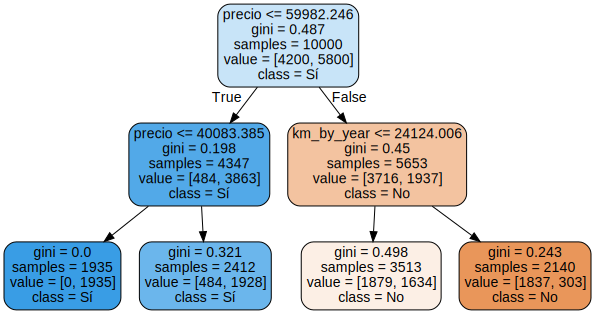

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)
features = x_ord.columns
dot_data = export_graphviz(modelo, feature_names = features, filled=True, rounded=True, class_names=['No', 'Sí'])
grafico = graphviz.Source(dot_data)
grafico

In [ ]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 78.67
Intervalo [76.40, 80.94]


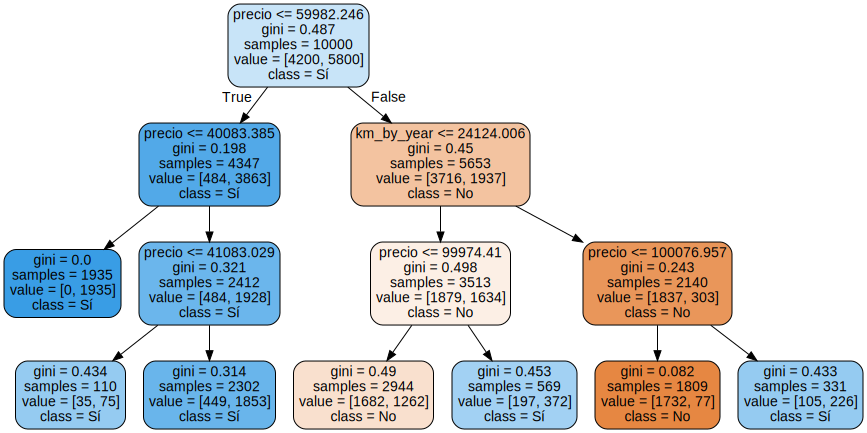

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)
features = x_ord.columns
dot_data = export_graphviz(modelo, feature_names = features, filled=True, rounded=True, class_names=['No', 'Sí'])
grafico = graphviz.Source(dot_data)
grafico

In [ ]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 77.19
Intervalo [75.26, 79.13]


# Probando parámetros

In [ ]:
import pandas as pd

def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  print('Arbol max_depth = %d, training = %.2f, testing = %.2f' % (max_depth, train_score, test_score))
  tabla = [max_depth, train_score, test_score]
  return tabla

resultados = [iniciar_arbol_de_decision(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns=['max_depth', 'train', 'test'])
resultados.head()

Arbol max_depth = 1, training = 75.79, testing = 75.78
Arbol max_depth = 2, training = 75.79, testing = 75.78
Arbol max_depth = 3, training = 78.75, testing = 78.67
Arbol max_depth = 4, training = 78.79, testing = 78.63
Arbol max_depth = 5, training = 78.94, testing = 78.56
Arbol max_depth = 6, training = 79.17, testing = 78.12
Arbol max_depth = 7, training = 79.50, testing = 77.96
Arbol max_depth = 8, training = 79.89, testing = 77.86
Arbol max_depth = 9, training = 80.46, testing = 77.38
Arbol max_depth = 10, training = 81.16, testing = 77.19
Arbol max_depth = 11, training = 82.03, testing = 76.97
Arbol max_depth = 12, training = 82.89, testing = 76.49
Arbol max_depth = 13, training = 83.95, testing = 75.81
Arbol max_depth = 14, training = 85.03, testing = 75.66
Arbol max_depth = 15, training = 86.14, testing = 75.16
Arbol max_depth = 16, training = 87.19, testing = 75.11
Arbol max_depth = 17, training = 88.31, testing = 74.74
Arbol max_depth = 18, training = 89.26, testing = 74.33
A

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


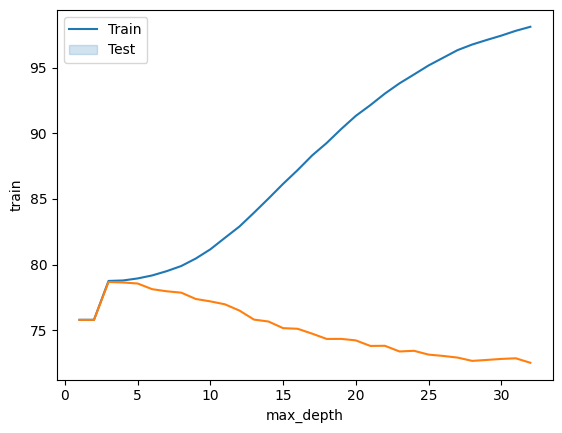

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x='max_depth', y = 'train', data=resultados)
sns.lineplot(x='max_depth', y = 'test', data=resultados)
plt.legend(['Train', 'Test'])

In [ ]:
resultados.sort_values('test', ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


In [ ]:
for x in range(1,64):
  for y in range(1,64):
    print('max_depth: ' + str(x) + ' - min_depth_leaf: ' + str(y))

max_depth: 1 - min_depth_leaf: 1
max_depth: 1 - min_depth_leaf: 2
max_depth: 1 - min_depth_leaf: 3
max_depth: 1 - min_depth_leaf: 4
max_depth: 1 - min_depth_leaf: 5
max_depth: 1 - min_depth_leaf: 6
max_depth: 1 - min_depth_leaf: 7
max_depth: 1 - min_depth_leaf: 8
max_depth: 1 - min_depth_leaf: 9
max_depth: 1 - min_depth_leaf: 10
max_depth: 1 - min_depth_leaf: 11
max_depth: 1 - min_depth_leaf: 12
max_depth: 1 - min_depth_leaf: 13
max_depth: 1 - min_depth_leaf: 14
max_depth: 1 - min_depth_leaf: 15
max_depth: 1 - min_depth_leaf: 16
max_depth: 1 - min_depth_leaf: 17
max_depth: 1 - min_depth_leaf: 18
max_depth: 1 - min_depth_leaf: 19
max_depth: 1 - min_depth_leaf: 20
max_depth: 1 - min_depth_leaf: 21
max_depth: 1 - min_depth_leaf: 22
max_depth: 1 - min_depth_leaf: 23
max_depth: 1 - min_depth_leaf: 24
max_depth: 1 - min_depth_leaf: 25
max_depth: 1 - min_depth_leaf: 26
max_depth: 1 - min_depth_leaf: 27
max_depth: 1 - min_depth_leaf: 28
max_depth: 1 - min_depth_leaf: 29
max_depth: 1 - min_dept

# Explorando hiper-parámetros en dos dimensiones

In [ ]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  train_score = results['train_score'].mean()*100
  test_score = results['test_score'].mean()*100
  print('Arbol max_depth = %d, min_samples_leaf = %d, training = %.2f, testing = %.2f' % (max_depth, min_samples_leaf, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, train_score, test_score]
  return tabla

def buscar():
  resultados = []
  for max_depth in range(1,32):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples', 'train', 'test'])
  return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 32, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 32, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 64, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 32, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 64, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 128, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256, training = 78.75, testing = 78.67
Arbol max_depth = 4, min_samples_leaf = 32, training = 78.

,max_depth,min_samples,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [ ]:
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples,train,test
11,3,256,78.750993,78.672633
8,3,32,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633


### Matriz de correlación y explorando más espacios de parámeros.

In [ ]:
corr = resultados.corr()
corr

,max_depth,min_samples,train,test
max_depth,1.000000e+00,-2.819789e-16,0.546146,-0.024381
min_samples,-2.819789e-16,1.000000e+00,-0.401773,0.341805
train,5.461464e-01,-4.017734e-01,1.000000,0.133720
test,-2.438091e-02,3.418055e-01,0.133720,1.000000


<Axes: >

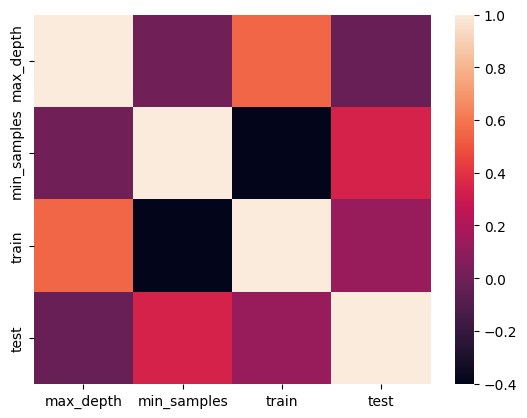

In [ ]:
sns.heatmap(corr)

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples', ylabel='max_depth'>,
        <Axes: xlabel='train', ylabel='max_depth'>,
        <Axes: xlabel='test', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples'>,
        <Axes: xlabel='min_samples', ylabel='min_samples'>,
        <Axes: xlabel='train', ylabel='min_samples'>,
        <Axes: xlabel='test', ylabel='min_samples'>],
       [<Axes: xlabel='max_depth', ylabel='train'>,
        <Axes: xlabel='min_samples', ylabel='train'>,
        <Axes: xlabel='train', ylabel='train'>,
        <Axes: xlabel='test', ylabel='train'>],
       [<Axes: xlabel='max_depth', ylabel='test'>,
        <Axes: xlabel='min_samples', ylabel='test'>,
        <Axes: xlabel='train', ylabel='test'>,
        <Axes: xlabel='test', ylabel='test'>]], dtype=object)

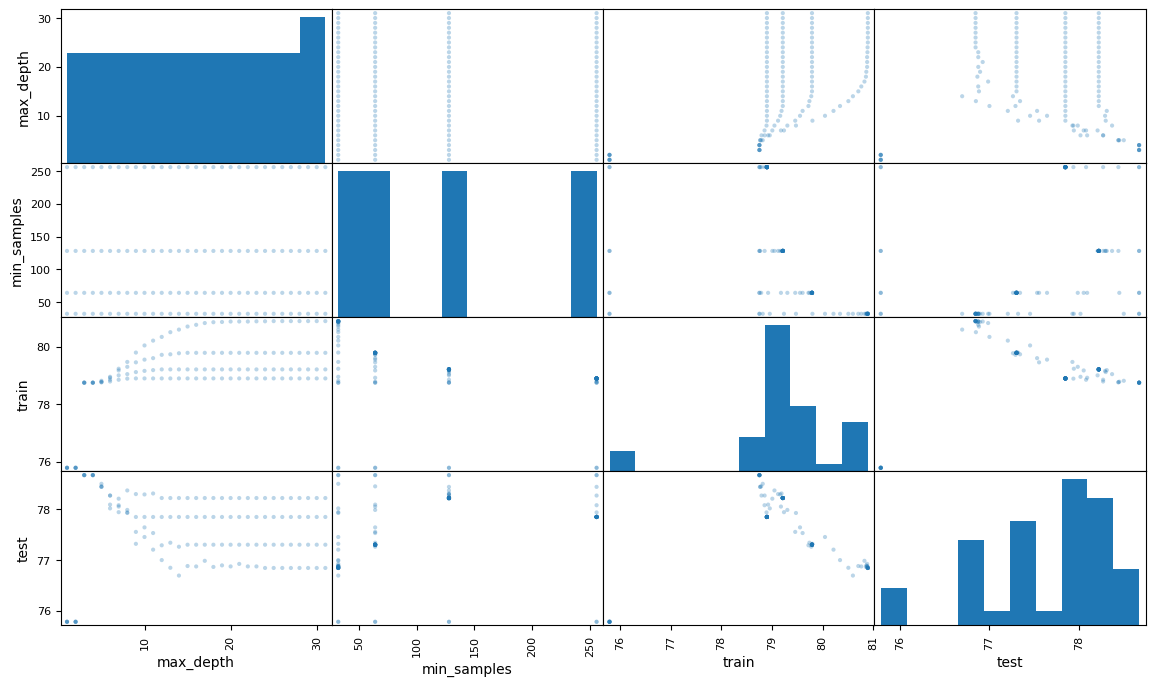

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(resultados, figsize = (14,8), alpha = 0.3)

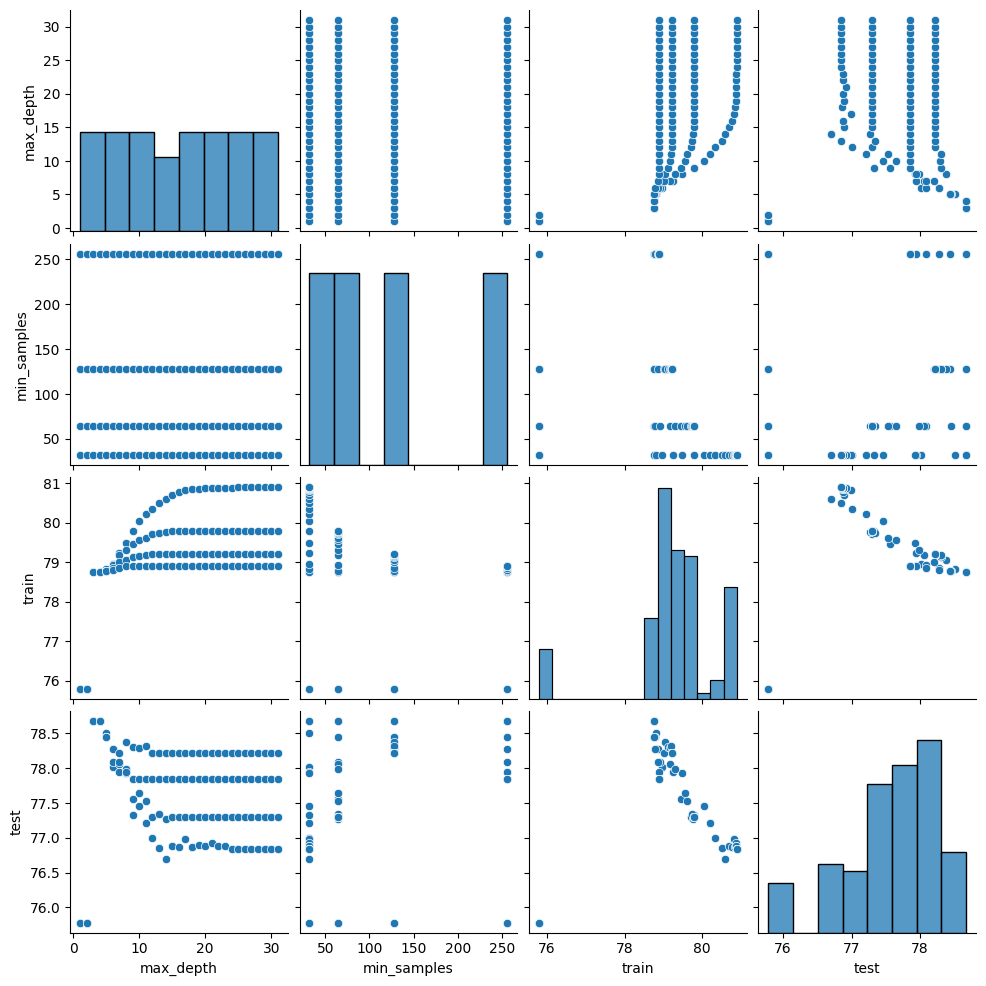

In [ ]:
sns.pairplot(resultados)

<Axes: >

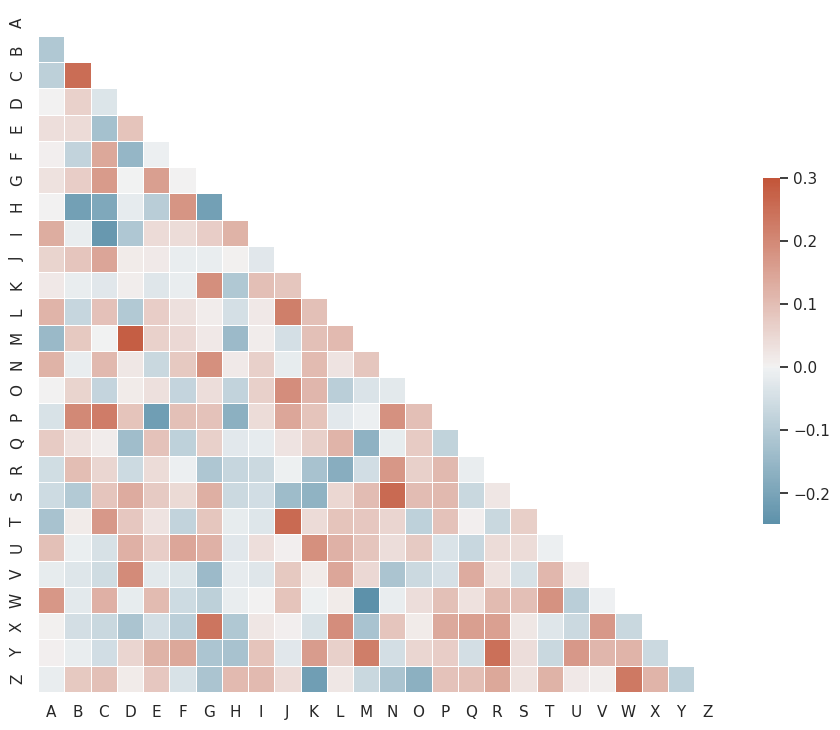

In [ ]:
#Seaborn Correlation

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
def buscar():
  resultados = []
  for max_depth in range(1,10):
    for min_samples_leaf in [128, 190, 220, 256]:
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples', 'train', 'test'])
  return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 190, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 220, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 190, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 220, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 128, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 190, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 220, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256, training = 78.75, testing = 78.67
Arbol max_depth = 4, min_samples_leaf = 128, trainin

,max_depth,min_samples,train,test
0,1,128,75.791169,75.784219
1,1,190,75.791169,75.784219
2,1,220,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,128,75.791169,75.784219


In [ ]:
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples,train,test
13,4,190,78.750993,78.672633
11,3,256,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,220,78.750993,78.672633
12,4,128,78.750993,78.672633


### Explorando 3 o más hiper parámetros.

In [ ]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  train_score = results['train_score'].mean()*100
  test_score = results['test_score'].mean()*100
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  print('Arbol max_depth = %d, min_samples_leaf = %d, min_samples_split = %d, training = %.2f, testing = %.2f' % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabla

def buscar():
  resultados = []
  for max_depth in range(1,32):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'min_samples_split', 'train', 'test', 'fit_time', 'score_time'])
  return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 32, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 64, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 256, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 32, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 64, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 256, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, min_samples_split = 32, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, min_samples_split = 64, training

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.009762,0.004223
1,1,32,64,75.791169,75.784219,0.006618,0.002550
2,1,32,128,75.791169,75.784219,0.007242,0.002688
3,1,32,256,75.791169,75.784219,0.006501,0.002251
4,1,64,32,75.791169,75.784219,0.006097,0.002277


In [ ]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
max_depth,1.000000e+00,1.642886e-16,3.990718e-16,0.538343,0.015135,0.449554,0.153607
min_samples_leaf,1.642886e-16,1.000000e+00,9.965536e-19,-0.334243,0.280463,-0.313627,-0.000152
min_samples_split,3.990718e-16,9.965536e-19,1.000000e+00,-0.123452,0.130175,-0.047868,-0.008079
train,5.383434e-01,-3.342432e-01,-1.234515e-01,1.000000,0.263804,0.603206,0.130207
test,1.513479e-02,2.804627e-01,1.301748e-01,0.263804,1.000000,0.014802,0.100478
fit_time,4.495538e-01,-3.136274e-01,-4.786824e-02,0.603206,0.014802,1.000000,0.776392
score_time,1.536070e-01,-1.521539e-04,-8.078645e-03,0.130207,0.100478,0.776392,1.000000


<Axes: >

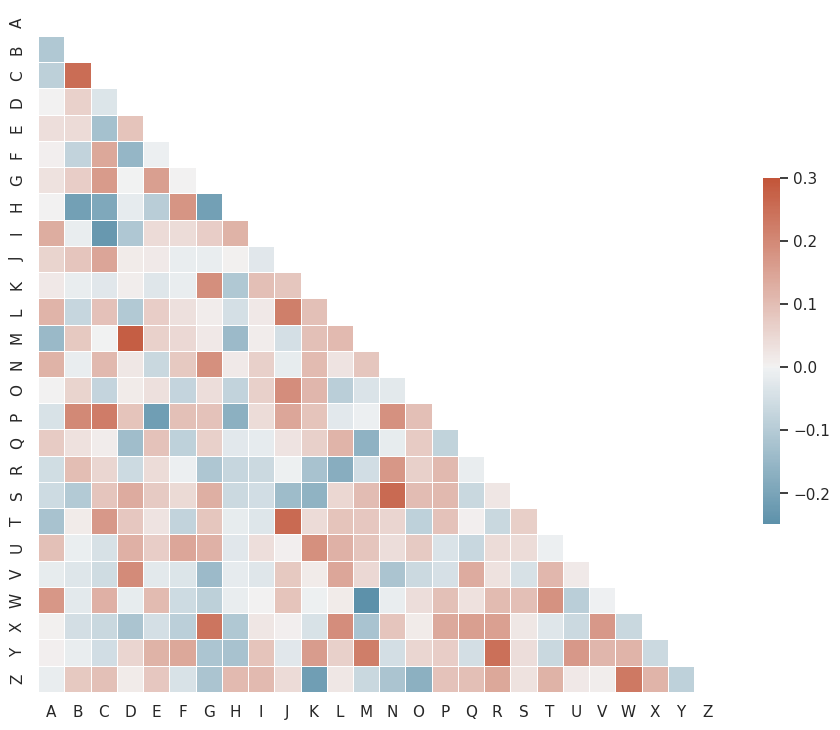

In [ ]:
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
45,3,256,64,78.750993,78.672633,0.012184,0.003061
41,3,128,64,78.750993,78.672633,0.011153,0.002415
48,4,32,32,78.750993,78.672633,0.014056,0.003182
47,3,256,256,78.750993,78.672633,0.011569,0.002868
46,3,256,128,78.750993,78.672633,0.012125,0.002916


### Explorando espacio de hiper parámetros con GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'max_depth': [3,5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = GroupKFold(n_splits = 10))
buscar.fit(x_ord, y_ord, groups = datos.modelo)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012968,0.003202,0.002714,0.000436,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.012027,0.000876,0.002556,0.000129,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.012260,0.001314,0.002713,0.000451,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.011503,0.000171,0.002551,0.000153,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.011402,0.000381,0.002521,0.000190,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [ ]:
print(buscar.best_params_)
print(buscar.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [ ]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [ ]:
from sklearn.metrics import accuracy_score

prediccion = mejor.predict(x_ord)
accuracy = accuracy_score(prediccion, y_ord) * 100
print('Accuracy para los datos fue %.2f%%' % accuracy)

Accuracy para los datos fue 78.75%


### Nested Cross Validation y validando el mejor modelo.

In [ ]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'max_depth': [3,5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = KFold(n_splits = 5, shuffle = True))
buscar.fit(x_ord, y_ord)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028601,0.008002,0.006003,0.002736,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.014923,0.000295,0.004660,0.000197,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.028339,0.007201,0.006130,0.002928,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.019571,0.010355,0.004502,0.000985,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.014377,0.000177,0.004079,0.000218,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(buscar, x_ord, y_ord, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [ ]:
def imprime_score(scores):
  media = scores.mean() * 100
  desviacion = scores.std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [ ]:
imprime_score(scores)

Accuracy media 78.67
Intervalo [76.80, 80.54]


In [ ]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

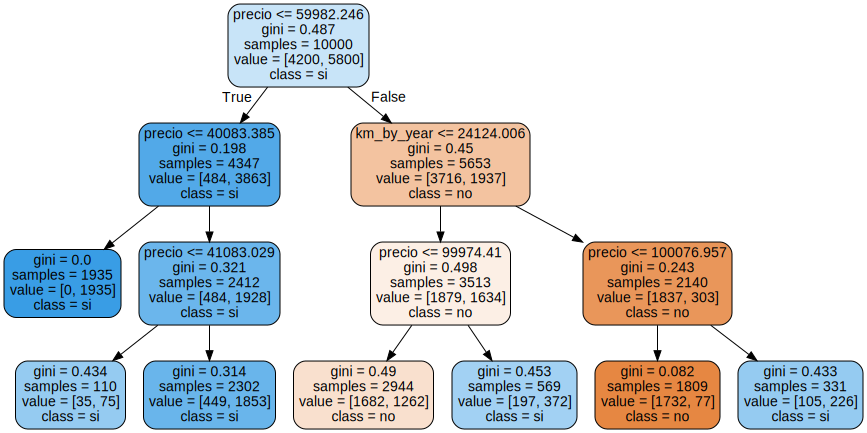

In [ ]:
features = x_ord.columns
dot_data = export_graphviz(mejor, out_file=None, filled=True, rounded=True,
                           class_names=['no', 'si'],
                           feature_names = features)

graph = graphviz.Source(dot_data)
graph